In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format='svg'

G:\newage2\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df=pd.read_csv('train_Data.csv')

In [3]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], dtype='object')

In [4]:
df_min=df[df['10']==1]

In [5]:
df_min.to_csv('page-blocks0_minority_train.csv',index=False)
df_min=pd.read_csv('page-blocks0_minority_train.csv')

In [6]:
df_majority=df[df['10']==0]
df_majority.to_csv('page-blocks0_majority_train.csv',index=False)
df_majority=pd.read_csv('page-blocks0_majority_train.csv')

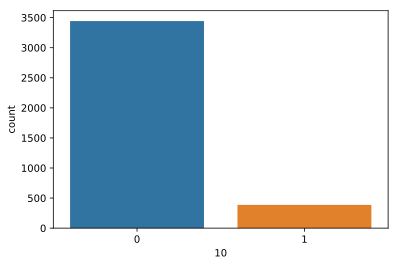

In [7]:
%matplotlib inline
sns.countplot(x='10',data=df)

In [8]:
def create_dataset(dataset,look_back=1):
    
    datax,datay=[],[]
    
    for i in range(len(dataset)-look_back-1):
        a=dataset[i:(i+look_back),:]
        datax.append(a)
        datay.append(dataset[i+look_back,:])
    
    return np.array(datax),np.array(datay)

In [9]:
df_minor=np.array(df_min)
scaler=MinMaxScaler(feature_range=(0,1))

df_minor=scaler.fit_transform(df_min)

x,y=create_dataset(df_minor,5)#5
print(x.shape)
print(y.shape)

(381, 5, 11)
(381, 11)


In [10]:
Xtrain,xtest,Ytrain,ytest=train_test_split(x,y,test_size=0.40,random_state=60)

In [11]:
model=Sequential()
model.add(LSTM(20,input_shape=(Xtrain.shape[1],Xtrain.shape[2])))#5
model.add(Dense(11))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20)                2560      
_________________________________________________________________
dense_1 (Dense)              (None, 11)                231       
Total params: 2,791
Trainable params: 2,791
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
model.compile(loss='mse',optimizer='adam')

In [13]:
history=model.fit(Xtrain,Ytrain,epochs=1000,verbose=1)

Epoch 1/1000
228/228 [==============================] - 3s 14ms/step - loss: 0.1478
Epoch 2/1000
228/228 [==============================] - 0s 532us/step - loss: 0.1265
Epoch 3/1000
228/228 [==============================] - 0s 594us/step - loss: 0.1081
Epoch 4/1000
228/228 [==============================] - 0s 554us/step - loss: 0.0917
Epoch 5/1000
228/228 [==============================] - 0s 805us/step - loss: 0.0770
Epoch 6/1000
228/228 [==============================] - 0s 783us/step - loss: 0.0635
Epoch 7/1000
228/228 [==============================] - 0s 885us/step - loss: 0.0516
Epoch 8/1000
228/228 [==============================] - 0s 715us/step - loss: 0.0424
Epoch 9/1000
228/228 [==============================] - 0s 690us/step - loss: 0.0368
Epoch 10/1000
228/228 [==============================] - 0s 1ms/step - loss: 0.0336
Epoch 11/1000
228/228 [==============================] - 0s 2ms/step - loss: 0.0334
Epoch 12/1000
228/228 [==============================] - 0s 1ms/step

228/228 [==============================] - 0s 734us/step - loss: 0.0307
Epoch 98/1000
228/228 [==============================] - 0s 642us/step - loss: 0.0307
Epoch 99/1000
228/228 [==============================] - 0s 699us/step - loss: 0.0306
Epoch 100/1000
228/228 [==============================] - 0s 996us/step - loss: 0.0306
Epoch 101/1000
228/228 [==============================] - 0s 1ms/step - loss: 0.0308
Epoch 102/1000
228/228 [==============================] - 0s 1ms/step - loss: 0.0308
Epoch 103/1000
228/228 [==============================] - 0s 928us/step - loss: 0.0307
Epoch 104/1000
228/228 [==============================] - 0s 800us/step - loss: 0.0305
Epoch 105/1000
228/228 [==============================] - 0s 614us/step - loss: 0.0306
Epoch 106/1000
228/228 [==============================] - 0s 677us/step - loss: 0.0307
Epoch 107/1000
228/228 [==============================] - 0s 655us/step - loss: 0.0307
Epoch 108/1000
228/228 [==============================] - 0s 638

228/228 [==============================] - 0s 980us/step - loss: 0.0296
Epoch 192/1000
228/228 [==============================] - 0s 682us/step - loss: 0.0300
Epoch 193/1000
228/228 [==============================] - 0s 712us/step - loss: 0.0295
Epoch 194/1000
228/228 [==============================] - 0s 699us/step - loss: 0.0298
Epoch 195/1000
228/228 [==============================] - 0s 706us/step - loss: 0.0296
Epoch 196/1000
228/228 [==============================] - 0s 709us/step - loss: 0.0298
Epoch 197/1000
228/228 [==============================] - 0s 710us/step - loss: 0.0297
Epoch 198/1000
228/228 [==============================] - 0s 712us/step - loss: 0.0297
Epoch 199/1000
228/228 [==============================] - 0s 724us/step - loss: 0.0297
Epoch 200/1000
228/228 [==============================] - 0s 750us/step - loss: 0.0296
Epoch 201/1000
228/228 [==============================] - 0s 796us/step - loss: 0.0298
Epoch 202/1000
228/228 [==============================] - 

228/228 [==============================] - 0s 741us/step - loss: 0.0290
Epoch 286/1000
228/228 [==============================] - 0s 699us/step - loss: 0.0289
Epoch 287/1000
228/228 [==============================] - 0s 726us/step - loss: 0.0288
Epoch 288/1000
228/228 [==============================] - 0s 734us/step - loss: 0.0290
Epoch 289/1000
228/228 [==============================] - 0s 760us/step - loss: 0.0286
Epoch 290/1000
228/228 [==============================] - 0s 732us/step - loss: 0.0290
Epoch 291/1000
228/228 [==============================] - 0s 690us/step - loss: 0.0289
Epoch 292/1000
228/228 [==============================] - 0s 748us/step - loss: 0.0290
Epoch 293/1000
228/228 [==============================] - 0s 739us/step - loss: 0.0286
Epoch 294/1000
228/228 [==============================] - 0s 752us/step - loss: 0.0288
Epoch 295/1000
228/228 [==============================] - 0s 748us/step - loss: 0.0286
Epoch 296/1000
228/228 [==============================] - 

228/228 [==============================] - 0s 756us/step - loss: 0.0281
Epoch 380/1000
228/228 [==============================] - 0s 659us/step - loss: 0.0279
Epoch 381/1000
228/228 [==============================] - 0s 657us/step - loss: 0.0279
Epoch 382/1000
228/228 [==============================] - 0s 666us/step - loss: 0.0279
Epoch 383/1000
228/228 [==============================] - 0s 638us/step - loss: 0.0277
Epoch 384/1000
228/228 [==============================] - 0s 717us/step - loss: 0.0277
Epoch 385/1000
228/228 [==============================] - 0s 795us/step - loss: 0.0280
Epoch 386/1000
228/228 [==============================] - 0s 685us/step - loss: 0.0276
Epoch 387/1000
228/228 [==============================] - 0s 750us/step - loss: 0.0277
Epoch 388/1000
228/228 [==============================] - 0s 722us/step - loss: 0.0278
Epoch 389/1000
228/228 [==============================] - 0s 708us/step - loss: 0.0278
Epoch 390/1000
228/228 [==============================] - 

228/228 [==============================] - 0s 743us/step - loss: 0.0267
Epoch 474/1000
228/228 [==============================] - 0s 743us/step - loss: 0.0267
Epoch 475/1000
228/228 [==============================] - 0s 668us/step - loss: 0.0267
Epoch 476/1000
228/228 [==============================] - 0s 673us/step - loss: 0.0268
Epoch 477/1000
228/228 [==============================] - 0s 743us/step - loss: 0.0270
Epoch 478/1000
228/228 [==============================] - 0s 1ms/step - loss: 0.0267
Epoch 479/1000
228/228 [==============================] - 0s 693us/step - loss: 0.0271
Epoch 480/1000
228/228 [==============================] - 0s 785us/step - loss: 0.0265
Epoch 481/1000
228/228 [==============================] - 0s 719us/step - loss: 0.0268
Epoch 482/1000
228/228 [==============================] - 0s 963us/step - loss: 0.0267
Epoch 483/1000
228/228 [==============================] - 0s 723us/step - loss: 0.0267
Epoch 484/1000
228/228 [==============================] - 0s

228/228 [==============================] - 0s 761us/step - loss: 0.0258
Epoch 568/1000
228/228 [==============================] - 0s 745us/step - loss: 0.0258
Epoch 569/1000
228/228 [==============================] - 0s 756us/step - loss: 0.0256
Epoch 570/1000
228/228 [==============================] - 0s 745us/step - loss: 0.0257
Epoch 571/1000
228/228 [==============================] - 0s 649us/step - loss: 0.0257
Epoch 572/1000
228/228 [==============================] - 0s 660us/step - loss: 0.0258
Epoch 573/1000
228/228 [==============================] - 0s 682us/step - loss: 0.0256
Epoch 574/1000
228/228 [==============================] - 0s 699us/step - loss: 0.0255
Epoch 575/1000
228/228 [==============================] - 0s 682us/step - loss: 0.0256
Epoch 576/1000
228/228 [==============================] - 0s 646us/step - loss: 0.0256
Epoch 577/1000
228/228 [==============================] - 0s 660us/step - loss: 0.0255
Epoch 578/1000
228/228 [==============================] - 

228/228 [==============================] - 0s 695us/step - loss: 0.0244
Epoch 662/1000
228/228 [==============================] - 0s 686us/step - loss: 0.0245
Epoch 663/1000
228/228 [==============================] - 0s 635us/step - loss: 0.0245
Epoch 664/1000
228/228 [==============================] - 0s 629us/step - loss: 0.0245
Epoch 665/1000
228/228 [==============================] - 0s 629us/step - loss: 0.0243
Epoch 666/1000
228/228 [==============================] - 0s 624us/step - loss: 0.0245
Epoch 667/1000
228/228 [==============================] - 0s 616us/step - loss: 0.0246
Epoch 668/1000
228/228 [==============================] - 0s 664us/step - loss: 0.0243
Epoch 669/1000
228/228 [==============================] - 0s 668us/step - loss: 0.0245
Epoch 670/1000
228/228 [==============================] - 0s 642us/step - loss: 0.0244
Epoch 671/1000
228/228 [==============================] - 0s 624us/step - loss: 0.0242
Epoch 672/1000
228/228 [==============================] - 

228/228 [==============================] - 0s 697us/step - loss: 0.0231
Epoch 756/1000
228/228 [==============================] - 0s 651us/step - loss: 0.0232
Epoch 757/1000
228/228 [==============================] - 0s 696us/step - loss: 0.0231
Epoch 758/1000
228/228 [==============================] - 0s 723us/step - loss: 0.0230
Epoch 759/1000
228/228 [==============================] - 0s 669us/step - loss: 0.0229
Epoch 760/1000
228/228 [==============================] - 0s 695us/step - loss: 0.0231
Epoch 761/1000
228/228 [==============================] - 0s 710us/step - loss: 0.0230
Epoch 762/1000
228/228 [==============================] - 0s 717us/step - loss: 0.0233
Epoch 763/1000
228/228 [==============================] - 0s 737us/step - loss: 0.0232
Epoch 764/1000
228/228 [==============================] - 0s 714us/step - loss: 0.0229
Epoch 765/1000
228/228 [==============================] - 0s 675us/step - loss: 0.0231
Epoch 766/1000
228/228 [==============================] - 

228/228 [==============================] - 0s 774us/step - loss: 0.0220
Epoch 850/1000
228/228 [==============================] - 0s 712us/step - loss: 0.0219
Epoch 851/1000
228/228 [==============================] - 0s 740us/step - loss: 0.0219
Epoch 852/1000
228/228 [==============================] - 0s 732us/step - loss: 0.0218
Epoch 853/1000
228/228 [==============================] - 0s 668us/step - loss: 0.0217
Epoch 854/1000
228/228 [==============================] - 0s 690us/step - loss: 0.0218
Epoch 855/1000
228/228 [==============================] - 0s 765us/step - loss: 0.0220
Epoch 856/1000
228/228 [==============================] - 0s 695us/step - loss: 0.0221
Epoch 857/1000
228/228 [==============================] - 0s 728us/step - loss: 0.0217
Epoch 858/1000
228/228 [==============================] - 0s 739us/step - loss: 0.0219
Epoch 859/1000
228/228 [==============================] - 0s 688us/step - loss: 0.0217
Epoch 860/1000
228/228 [==============================] - 

228/228 [==============================] - 0s 820us/step - loss: 0.0210
Epoch 944/1000
228/228 [==============================] - 0s 690us/step - loss: 0.0208
Epoch 945/1000
228/228 [==============================] - 0s 712us/step - loss: 0.0212
Epoch 946/1000
228/228 [==============================] - 0s 777us/step - loss: 0.0210
Epoch 947/1000
228/228 [==============================] - 0s 688us/step - loss: 0.0208
Epoch 948/1000
228/228 [==============================] - 0s 739us/step - loss: 0.0208
Epoch 949/1000
228/228 [==============================] - 0s 761us/step - loss: 0.0209
Epoch 950/1000
228/228 [==============================] - 0s 660us/step - loss: 0.0208
Epoch 951/1000
228/228 [==============================] - 0s 929us/step - loss: 0.0211
Epoch 952/1000
228/228 [==============================] - 0s 944us/step - loss: 0.0208
Epoch 953/1000
228/228 [==============================] - 0s 880us/step - loss: 0.0208
Epoch 954/1000
228/228 [==============================] - 

In [14]:
model.save('page-blocks0.h5')

In [15]:
Xtrain.shape

(228, 5, 11)

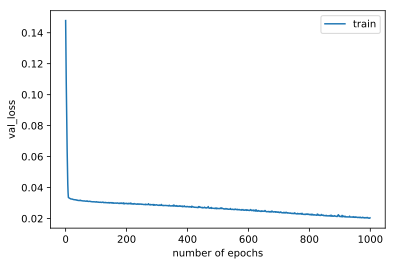

In [16]:
plt.plot(history.history['loss'],label='train')
#plt.plot(history.history['val_loss'],label='test')
plt.xlabel('number of epochs')
plt.ylabel('val_loss')
plt.legend()
#pyplot.savefig('LSTM training.png',dpi=300)
plt.show()

In [17]:
prediction=model.predict(xtest)

In [18]:
def draw_prediction(ytest,d,columns):
    
    _,axes=plt.subplots(len(columns),1,figsize=(10,20))
    
    for i,cols in enumerate(columns):
        
        axes[i].plot(ytest[:,i],label='real',color='blue')
        axes[i].plot(d[:,i],label='prediction',color='orange')
        #axes[i].set_xlabel='index'
        #axes[i].set_ylabel=cols
        axes[i].xlabel='index'
        axes[i].ylabel=cols

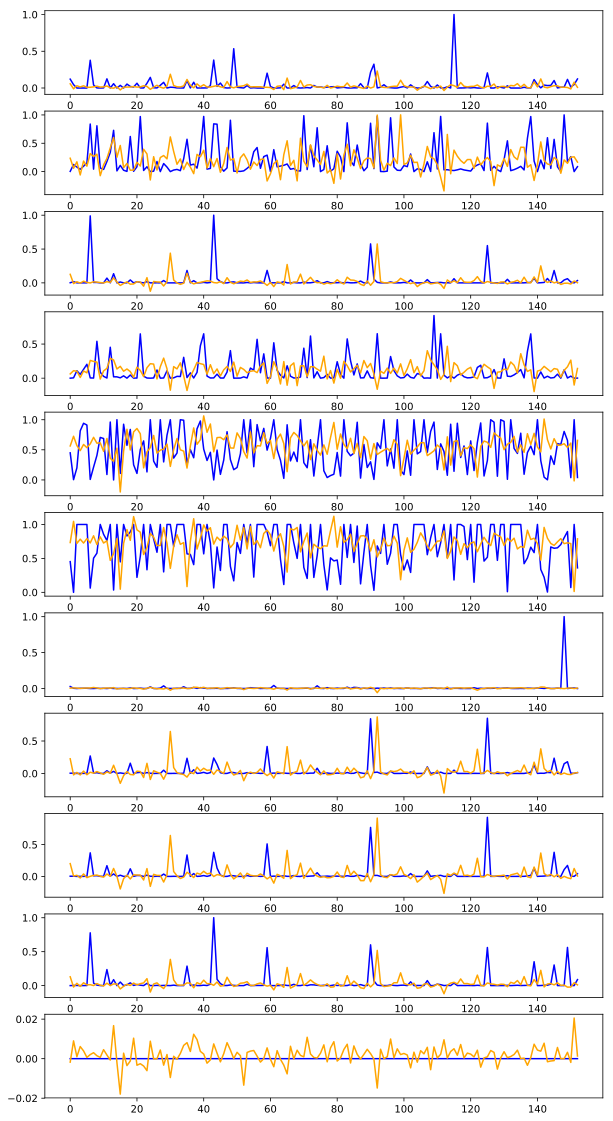

In [19]:
clmns=df.columns
draw_prediction(ytest,prediction,clmns)

In [20]:
prediction

array([[ 0.05724099,  0.23578446,  0.12642208, ...,  0.20154113,
         0.12973659, -0.00174678],
       [-0.01043345,  0.05867895, -0.01044215, ...,  0.00630465,
        -0.02129556,  0.00900334],
       [ 0.03073217,  0.17260271,  0.01707026, ...,  0.0181433 ,
         0.03387412,  0.00098634],
       ...,
       [-0.01262502,  0.2536158 , -0.0169773 , ..., -0.03548053,
        -0.02112646, -0.00187535],
       [ 0.07932036,  0.26076412,  0.02745027, ...,  0.12454829,
         0.04249363,  0.02055124],
       [ 0.00918693,  0.16689572,  0.00209561, ...,  0.00631968,
         0.01062355,  0.00134948]], dtype=float32)

In [21]:
prediction2=scaler.inverse_transform(prediction)

In [22]:
ytest2=scaler.inverse_transform(ytest)

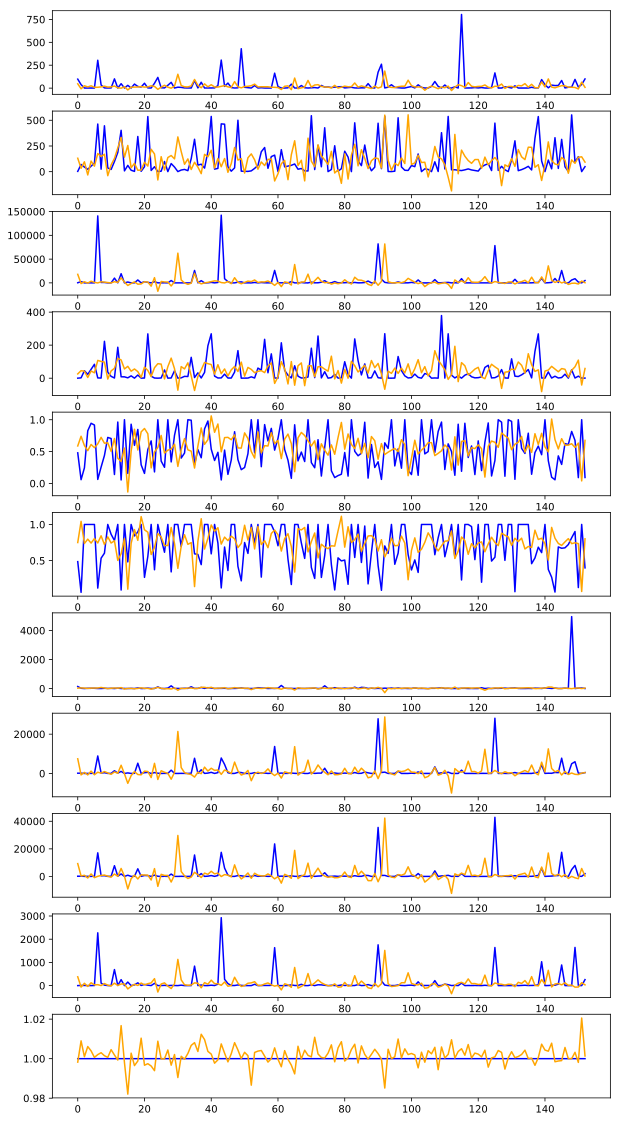

In [23]:
draw_prediction(ytest2,prediction2,clmns)

In [24]:
prediction

array([[ 0.05724099,  0.23578446,  0.12642208, ...,  0.20154113,
         0.12973659, -0.00174678],
       [-0.01043345,  0.05867895, -0.01044215, ...,  0.00630465,
        -0.02129556,  0.00900334],
       [ 0.03073217,  0.17260271,  0.01707026, ...,  0.0181433 ,
         0.03387412,  0.00098634],
       ...,
       [-0.01262502,  0.2536158 , -0.0169773 , ..., -0.03548053,
        -0.02112646, -0.00187535],
       [ 0.07932036,  0.26076412,  0.02745027, ...,  0.12454829,
         0.04249363,  0.02055124],
       [ 0.00918693,  0.16689572,  0.00209561, ...,  0.00631968,
         0.01062355,  0.00134948]], dtype=float32)

In [25]:
new_data=pd.DataFrame(prediction2)

In [26]:
new_data.to_csv('new_corrected_data-v1.csv',index=False)